<H3>PRI 2022: second
    project delivery</H3>

**GROUP X**
- Álvaro Saldanha, 92416
- Vasco Cabral, 92568

<H2>Main facilities</H2>

<h3>Part I: clustering</h3>

**Please make sure to zip and upload the given BBC News Summary directory to the default directory (same as sample_data on google colab) before running.**

*A) Clustering*

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Reading the news Articles...
Processing the news articles...


100%|██████████| 2225/2225 [00:00<00:00, 6273.01it/s]


Studying k-means for varying k...


100%|██████████| 8/8 [00:20<00:00,  2.51s/it]


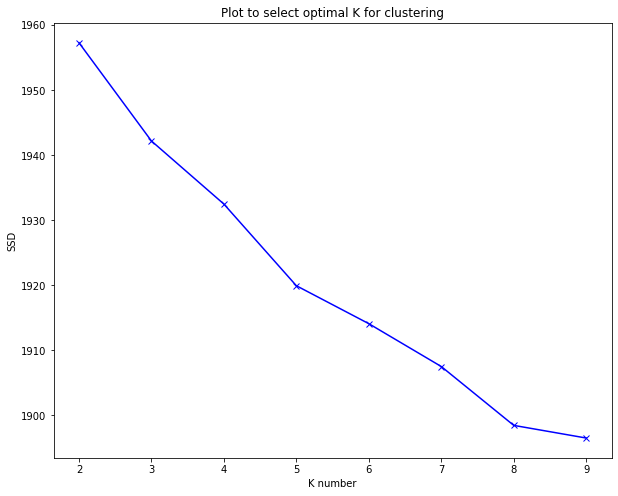

Select the best k from the elbow method:5
5
The silhouette_score for the best KMeans clustering is: 0.0017069207249137818
Studying agglomerative clustering for single linkage and cosine metric...


100%|██████████| 8/8 [09:26<00:00, 70.85s/it]


Studying agglomerative clustering for complete linkage and cosine metric...


100%|██████████| 8/8 [09:23<00:00, 70.39s/it]


<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

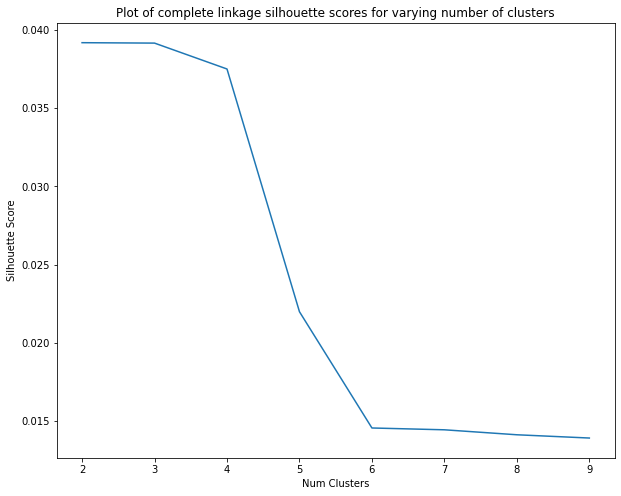

Studying agglomerative clustering for average linkage and cosine metric...


100%|██████████| 8/8 [09:29<00:00, 71.14s/it]


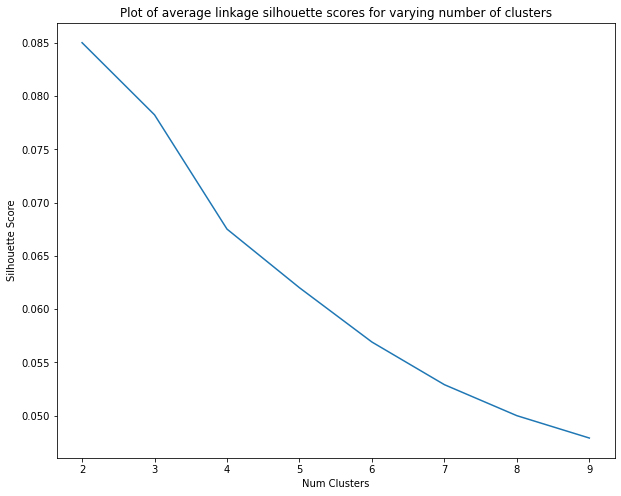

The maximum silhouette_score for complete linkage happened with 3 clusters. Silhouette value 0.039185217404010424
The maximum silhouette_score for single linkage happened with 3 clusters. Silhouette value 0.08550136964032273
The maximum silhouette_score for average linkage happened with 3 clusters. Silhouette value 0.08499279755375076
Studying agglomerative clustering for single linkage and euclidean metric...


100%|██████████| 8/8 [16:07<00:00, 120.97s/it]


Studying agglomerative clustering for complete linkage and euclidean metric...


100%|██████████| 8/8 [07:11<00:00, 53.88s/it]


<Figure size 720x576 with 0 Axes>

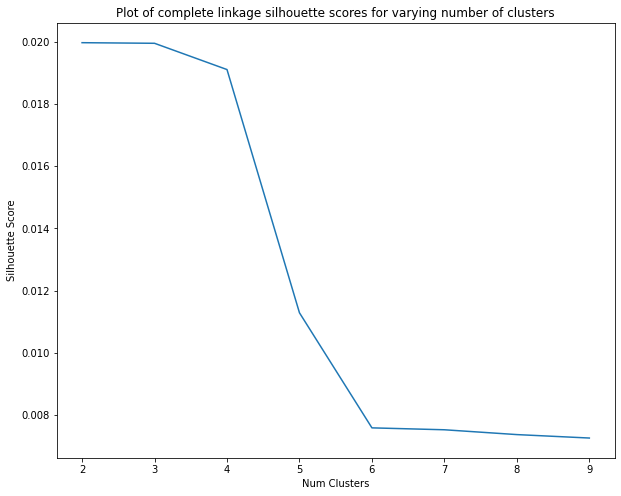

Studying agglomerative clustering for average linkage and euclidean metric...


100%|██████████| 8/8 [07:05<00:00, 53.18s/it]


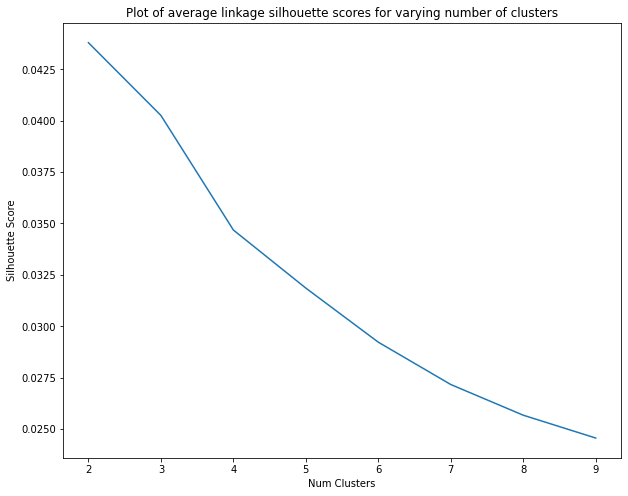

The maximum silhouette_score for complete linkage happened with 3 clusters. Silhouette value 0.01997082921891843
The maximum silhouette_score for single linkage happened with 3 clusters. Silhouette value 0.0440637921068429
The maximum silhouette_score for average linkage happened with 3 clusters. Silhouette value 0.04379234597532893
Studying DBSCAN...
The silhouette_score for DBSCAN is 0.017087590481306095
Chosen clustering solution is Agglomerative Clustering using single linkage and cosine distance for 3 clusters.
[0 0 0 ... 0 0 0]


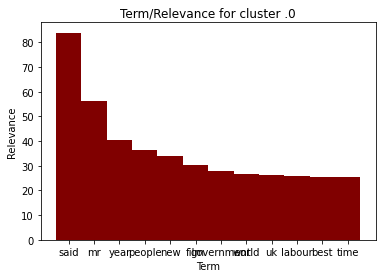

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram
import os  
from tqdm import tqdm
import operator
import statistics
from sklearn.feature_extraction import text
from IPython.display import display
import itertools
import zipfile as zf


try:
    nltk.data.find('stopwords')
except LookupError:  
    nltk.download('stopwords')

try: 
    nltk.data.find('punkt')
except LookupError: 
    nltk.download('punkt')

news_articles = []
processed_news_articles = []
clean_news_articles = []
clean_news_summaries = []
true_labels = []
reference_summaries = []

def file_body_processing(filebody): 
    filebody = re.sub(r"[\n]+[.]",'. ',filebody)
    filebody = re.sub(r"[:][-][')']",'',filebody)    
    filebody = re.sub(r"[\'][\']", '\"', filebody)
    filebody = re.sub(r"S.T.A.L.K.E.R.",'',filebody)
    filebody = re.sub(r"[' '][\n]+",'\n',filebody)
    filebody = re.sub(r"[\"][\n]+",'\" ',filebody)
    filebody = re.sub(r"[!][\n]+",'! ',filebody)
    filebody = re.sub(r"[?][\n]+",'? ',filebody)
    filebody = re.sub(r"[:][\n]+",': ',filebody)
    filebody = re.sub(r"[.][\n]+",'. ',filebody)
    filebody = re.sub(r"[\n]+",'. ',filebody)
    return filebody

def read_news_articles(): 
    articles_path = os.walk('BBC News Summary/News Articles')
    print("Reading the news Articles...")
    for article in articles_path: 
        for name in article[2]:
            try: 
                f = open(os.path.join(article[0],name),"r")
                news_article = f.read()
                news_articles.append(str(news_article))
                f.close()
            except: 
                f = open(os.path.join(article[0],name),'rb')
                news_article = f.read()
                news_articles.append(str(news_article))
                f.close()

def process_news_articles(): 
    print("Processing the news articles...")
    for article in tqdm(news_articles, colour='green'): 
        article = file_body_processing(article)
        article = article.lower()
        clean_news_articles.append(article)

def process_news_summaries(): 
    print("Processing news summaries...")
    for summary in tqdm(reference_summaries,colour='cyan'):
        clean_summary = file_body_processing(summary)
        clean_summary = clean_summary.lower()
        summarybody = re.sub(r'([a-z])\.([a-z])', r'\1. \2',clean_summary)
        summarybody = re.sub(r'([0-9])\.([a-z])', r'\1. \2',summarybody)
        summarybody = re.sub(r'([a-z])\.([0-9])', r'\1. \2',summarybody)
        clean_news_summaries.append(summarybody)

def read_reference_summaries(): 
    summaries_path = os.walk('BBC News Summary/Summaries')
    print("Reading the news summaries...")
    for dir_name, subdir_list, files in summaries_path: 
        for name in files: 
            try: 
                f = open(os.path.join(dir_name,name),'r')
                summary = f.read()
                reference_summaries.append(str(summary))
                f.close()
            except: 
                f = open(os.path.join(dir_name,name),'rb')
                summary = f.read()
                reference_summaries.append(str(summary))
                f.close()

def get_tfidf_vectors():
    tfidf = TfidfVectorizer()
    tfidf_vectors = tfidf.fit_transform(clean_news_articles)
    return tfidf_vectors

def k_means_study(article_vectors): 
    SSD = []
    print("Studying k-means for varying k...")
    for k in tqdm(range(2,10), colour = 'blue'):
        km = KMeans(n_clusters=k)
        km = km.fit(article_vectors)
        SSD.append(km.inertia_)
    plt.figure(figsize=(10,8))
    plt.title("Plot to select optimal K for clustering")
    plt.xlabel("K number")
    plt.ylabel("SSD")
    plt.plot(range(2,10),SSD,'bx-')
    plt.show()
    plt.clf()

def agglomerative_clustering(article_vectors, num_clusters, linkage, affinity):
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage,affinity=affinity,compute_distances=True)
    clustering = clustering.fit(article_vectors.toarray())
    return clustering.labels_

def study_agglomerative_clustering(article_vectors, metric):
    silhouette_scores = []
    print("Studying agglomerative clustering for single linkage and " + metric  + " metric...")
    for k in tqdm(range(2,10), colour = 'green'): 
        labels = agglomerative_clustering(article_vectors, k, 'single', metric)
        silhouette_scores.append(silhouette_score(article_vectors, labels, metric=metric))
    plt.figure(figsize=(10,8))
    plt.title("Plot of single linkage silhouette scores for varying number of clusters")
    plt.xlabel("Num Clusters")
    plt.ylabel("Silhouette Score")
    plt.plot(range(2,10),silhouette_scores)
    plt.clf()
    max_score = max(silhouette_scores)
    max_score_index = silhouette_scores.index(max_score)
    max_single_linkage = (max_score_index, max_score)
    silhouette_scores = []
    print("Studying agglomerative clustering for complete linkage and " + metric + " metric...")
    for k in tqdm(range(2,10), colour='cyan'): 
        labels = agglomerative_clustering(article_vectors, k, 'complete',metric)
        silhouette_scores.append(silhouette_score(article_vectors, labels, metric=metric))
    plt.figure(figsize=(10,8))
    plt.title("Plot of complete linkage silhouette scores for varying number of clusters")
    plt.xlabel("Num Clusters")
    plt.ylabel("Silhouette Score")
    plt.plot(range(2,10),silhouette_scores)
    plt.show()
    max_score = max(silhouette_scores)
    max_score_index = silhouette_scores.index(max_score)
    max_complete_linkage = (max_score_index, max_score)
    silhouette_scores = []
    print("Studying agglomerative clustering for average linkage and " + metric + " metric...")
    for k in tqdm(range(2,10), colour='magenta'): 
        labels = agglomerative_clustering(article_vectors, k, 'average',metric)
        silhouette_scores.append(silhouette_score(article_vectors, labels, metric=metric))
    plt.figure(figsize=(10,8))
    plt.title("Plot of average linkage silhouette scores for varying number of clusters")
    plt.xlabel("Num Clusters")
    plt.ylabel("Silhouette Score")
    plt.plot(range(2,10),silhouette_scores)
    plt.show()
    max_score = max(silhouette_scores)
    max_score_index = silhouette_scores.index(max_score)
    max_average_linkage = (max_score_index, max_score)
    return max_complete_linkage, max_single_linkage, max_average_linkage

def clustering(D): 
    scores = [] 
    k_means_study(article_vectors)
    best_k = input("Select the best k from the elbow method:")
    print(best_k)
    km = KMeans(n_clusters=int(best_k))
    km = km.fit(article_vectors)
    score = silhouette_score(article_vectors, km.labels_, metric='euclidean')
    scores.append(score)
    print("The silhouette_score for the best KMeans clustering is: " + str(score))
    max_complete_linkage_cos, max_single_linkage_cos, max_average_linkage_cos = study_agglomerative_clustering(article_vectors, metric = 'cosine')
    scores.append(max_single_linkage_cos[1])
    scores.append(max_complete_linkage_cos[1])
    scores.append(max_average_linkage_cos[1])
    print("The maximum silhouette_score for complete linkage happened with " + str(max_complete_linkage_cos[0] + 3) + " clusters. Silhouette value " + str(max_complete_linkage_cos[1]))
    print("The maximum silhouette_score for single linkage happened with " + str(max_single_linkage_cos[0] + 3) + " clusters. Silhouette value " + str(max_single_linkage_cos[1]))
    print("The maximum silhouette_score for average linkage happened with " + str(max_average_linkage_cos[0] + 3) + " clusters. Silhouette value " + str(max_average_linkage_cos[1]))
    max_complete_linkage, max_single_linkage, max_average_linkage = study_agglomerative_clustering(article_vectors, metric = 'euclidean')
    scores.append(max_single_linkage[1])
    scores.append(max_complete_linkage[1])
    scores.append(max_average_linkage[1])
    print("The maximum silhouette_score for complete linkage happened with " + str(max_complete_linkage[0] + 3) + " clusters. Silhouette value " + str(max_complete_linkage[1]))
    print("The maximum silhouette_score for single linkage happened with " + str(max_single_linkage[0] + 3) + " clusters. Silhouette value " + str(max_single_linkage[1]))
    print("The maximum silhouette_score for average linkage happened with " + str(max_average_linkage[0] + 3) + " clusters. Silhouette value " + str(max_average_linkage[1]))
    print("Studying DBSCAN...")
    dbscan= DBSCAN(eps = 1.25 , min_samples = 25)
    labels = dbscan.fit_predict(article_vectors.toarray())
    score = silhouette_score(article_vectors,labels,metric= 'euclidean')
    print("The silhouette_score for DBSCAN is " + str(score))
    scores.append(score)
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    if max_score_index == 0: 
        print("Chosen clustering solution is KMean for " + str(best_k) + "clusters")
        return  KMeans(n_clusters=int(best_k))
    elif max_score_index == 1: 
        print("Chosen clustering solution is Agglomerative Clustering using single linkage and cosine distance for " + str(max_single_linkage_cos[0] + 3) + " clusters.")
        return  AgglomerativeClustering(n_clusters=max_single_linkage_cos[0] + 3, linkage='single',affinity='cosine',compute_distances=True)
    elif max_score_index == 2:
        print("Chosen clustering solution is Agglomerative Clustering using complete linkage and cosine distance for " + str(max_complete_linkage_cos[0] + 3) + " clusters.")
        return  AgglomerativeClustering(n_clusters=max_complete_linkage_cos[0] + 3, linkage='complete',affinity='cosine',compute_distances=True)
    elif max_score_index == 3: 
        print("Chosen clustering solution is Agglomerative Clustering using average linkage and cosine distance for " + str(max_average_linkage_cos[0] + 3) + " clusters.")
        return  AgglomerativeClustering(n_clusters=max_average_linkage_cos[0] + 3, linkage='complete',affinity='cosine',compute_distances=True)
    elif max_score_index == 4: 
        print("Chosen clustering solution is Agglomerative Clustering using single linkage and euclidean distance for " + str(max_single_linkage[0] + 3) + " clusters.")
        return  AgglomerativeClustering(n_clusters=max_single_linkage[0] + 3, linkage='single',affinity='euclidean',compute_distances=True)
    elif max_score_index == 5:
        print("Chosen clustering solution is Agglomerative Clustering using complete linkage and cosine distance for " + str(max_complete_linkage[0] + 3) + " clusters.")
        return  AgglomerativeClustering(n_clusters=max_average_linkage[0] + 3, linkage='complete',affinity='euclidean',compute_distances=True)
    elif max_score_index == 6: 
        print("Chosen clustering solution is Agglomerative Clustering using average linkage and cosine distance for " + str(max_average_linkage[0] + 3) + " clusters.")
        return  AgglomerativeClustering(n_clusters=max_average_linkage[0] + 3, linkage='complete',affinity='euclidean',compute_distances=True)
    elif max_score_index == 7: 
        print("Chosen clustering solution is DBSCAN")
        return DBSCAN(eps = 1.25, min_samples = 25)

### CLUSTERING INTERPRETING ###

def interpret(cluster,D):
    to_interpret = []
    my_stop_words = text.ENGLISH_STOP_WORDS
    for doc in cluster[0]:
        to_interpret.append(clean_news_articles[doc])
    tfidf = TfidfVectorizer(stop_words=my_stop_words)
    to_interpret_vectors = tfidf.fit_transform(to_interpret)
    sums = to_interpret_vectors.sum(axis=0)
    results_dict = {}
    for col, term in enumerate(tfidf.get_feature_names_out()):
        results_dict[term] = sums[0,col]
    results_dict = dict(sorted(results_dict.items(), key=operator.itemgetter(1),reverse=True))
    return results_dict

def interpret_helper(clustering_solution):
    clustering = clustering_solution.fit(article_vectors.toarray())
    SELECTED_CLUSTER = 0
    cluster = [np.where(clustering.labels_ == SELECTED_CLUSTER)[0]]
    scores = interpret(cluster,None)
    scores = dict(itertools.islice(scores.items(), 12))
    plt.bar(scores.keys(), scores.values(), color ='maroon')
    plt.xlabel("Term")
    plt.ylabel("Relevance")
    plt.title("Term/Relevance for cluster ." + str(SELECTED_CLUSTER))
    plt.show()

# Unziping directory
home = os.path.expanduser("~")
files = zf.ZipFile("BBC News Summary.zip", 'r')
files.extractall("")
files.close()

read_news_articles()
process_news_articles()
article_vectors = get_tfidf_vectors()   

clustering_solution = clustering(None)
interpret_helper(clustering_solution)

*B) Visualization*

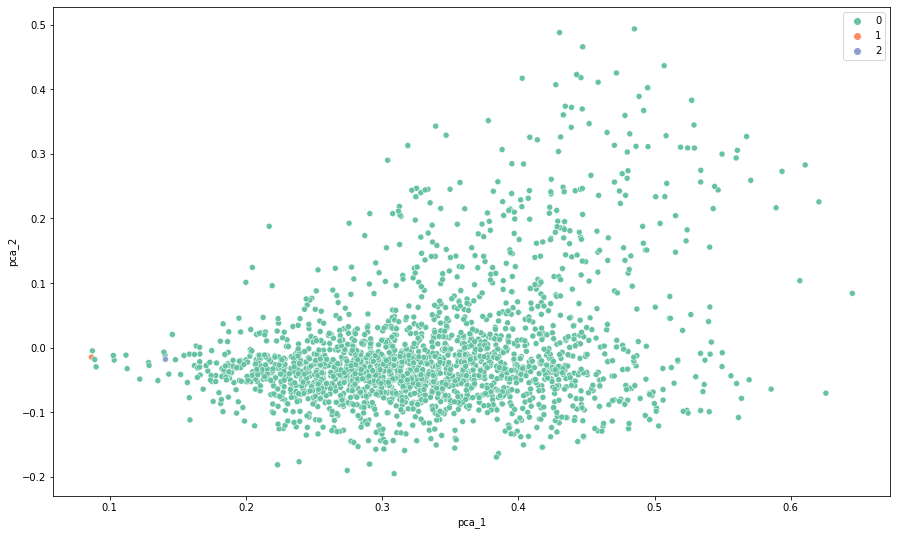

In [ ]:
from sklearn.decomposition import TruncatedSVD

def visualize(clustering_solution): 
  clustering = clustering_solution.fit(article_vectors.toarray())
  pca = TruncatedSVD(n_components = 2)
  pca_data = pca.fit_transform(article_vectors)
  pca_df = pd.DataFrame(pca_data, columns = ['pca_1', 'pca_2'])
  plt.figure(figsize = (15,9))
  sns.scatterplot(x=pca_df['pca_1'], y=pca_df['pca_2'],hue=clustering.labels_, palette='Set2')
  plt.show()
visualize(clustering_solution)

*C) Evaluation*

The silhouette score for the chosen clustering solution is: 0.0669949946709097
Plotting the learned dendrogram...


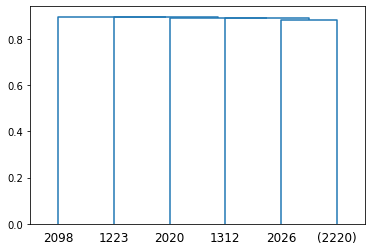

The adjusted rand index for the chosen solution is: -0.00011969809003756945


In [ ]:
def plot_dendrogram(model, **kwargs): 
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_): 
        current_count = 0
        for child_idx in merge: 
            if child_idx < n_samples: current_count += 1
            else: current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_ , counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

def get_true_labels(): 
    articles_path = 'BBC News Summary/News Articles'
    labels = []
    for label in os.listdir(articles_path):
        label_path = os.path.join(articles_path,label)
        for file_path in os.listdir(label_path): 
            labels.append(label_path.split('/')[-1])
    return labels

def evaluate(D, clustering_solution): 
    article_vectors = get_tfidf_vectors() 
    true_labels = get_true_labels()
    clustering = clustering_solution.fit(article_vectors.toarray())
    print("The silhouette score for the chosen clustering solution is: " + str(silhouette_score(article_vectors,clustering.labels_,metric='cosine')))
    print("Plotting the learned dendrogram...")
    plot_dendrogram(clustering, truncate_mode = 'level', p = 4)
    plt.show()
    print("The adjusted rand index for the chosen solution is: " + str(adjusted_rand_score(clustering.labels_,true_labels)))

evaluate(None, clustering_solution)

<h3>Part II: classification</h3>

*A) Feature extraction*

In [ ]:
def cosine_similarity(term_sentence_dict, term_document_dict, sentence_feature_names):
    dot_product = 0
    sentence_mod = 0
    document_mod = 0
    for term in sentence_feature_names: 
        dot_product += term_sentence_dict[term] * term_document_dict[term]
        sentence_mod += term_sentence_dict[term] * term_sentence_dict[term]
    for term in term_document_dict.keys():
        document_mod += term_document_dict[term] * term_document_dict[term]
    sentence_mod = np.sqrt(sentence_mod)
    document_mod = np.sqrt(document_mod)
    cosine_similarity = dot_product / (sentence_mod * document_mod)
    return cosine_similarity

def feature_extraction(s,d, sentence_count,num_sentences_in_article): 
    tfidf_sentence_term = TfidfVectorizer()
    term_sentence_vector = tfidf_sentence_term.fit_transform([s])
    term_sentence_dict = dict(zip(tfidf_sentence_term.get_feature_names_out(),term_sentence_vector.data))

    tfidf_document_term = TfidfVectorizer()
    term_document_vector = tfidf_document_term.fit_transform([d])
    term_document_dict = dict(zip(tfidf_document_term.get_feature_names_out(),term_document_vector.data))
    
    cos_similarity_tfidf = cosine_similarity(term_sentence_dict=term_sentence_dict, term_document_dict=term_document_dict, sentence_feature_names=tfidf_sentence_term.get_feature_names_out())

    tf_sentence_term = CountVectorizer()
    term_sentence_vector = tf_sentence_term.fit_transform([s])
    term_sentence_dict = dict(zip(tf_sentence_term.get_feature_names_out(),term_sentence_vector.data))

    tf_document_term = CountVectorizer()
    term_document_vector = tf_document_term.fit_transform([d])
    term_document_dict = dict(zip(tf_document_term.get_feature_names_out(),term_document_vector.data))

    cos_similarity_tf = cosine_similarity(term_sentence_dict=term_sentence_dict, term_document_dict=term_document_dict,sentence_feature_names=tf_sentence_term.get_feature_names_out())
    
    bm25_document_term_tf = CountVectorizer()
    term_document_vector_tf = bm25_document_term_tf.fit_transform([d])
    bm25_counts = term_document_vector_tf.data
    bm25_document_term_idf = TfidfVectorizer()
    term_document_vector = bm25_document_term_idf.fit_transform([d])
    bm25_idfs = term_document_vector.data
    n_features = len(bm25_document_term_idf.get_feature_names_out())
    avg_dl = n_features / num_sentences_in_article
    bm25_doc = [(bm25_idfs[i] * (2.2 * bm25_counts[i])) / (bm25_counts[i] + 1.2 * (0.25 + 0.75 * (n_features) / avg_dl)) for i in range(n_features)]
    term_document_dict = dict(zip(bm25_document_term_idf.get_feature_names_out(),bm25_doc))

    bm25_sentence_term_tf = CountVectorizer()
    term_sentence_vector_tf = bm25_sentence_term_tf.fit_transform([s])
    bm25_counts = term_sentence_vector_tf.data
    bm25_sentence_term_idf = TfidfVectorizer()
    term_sentence_vector = bm25_sentence_term_idf.fit_transform([s])
    bm25_idfs = term_sentence_vector.data
    n_features = len(bm25_sentence_term_idf.get_feature_names_out())
    bm25_sentence = [(bm25_idfs[i] * (2.2 * bm25_counts[i])) / (bm25_counts[i] + 1.2 * (0.25 + 0.75 * (n_features) / avg_dl)) for i in range(n_features)]
    term_sentence_dict = dict(zip(bm25_sentence_term_idf.get_feature_names_out(),bm25_sentence))

    cos_similarity_bm25 = cosine_similarity(term_sentence_dict=term_sentence_dict, term_document_dict=term_document_dict,sentence_feature_names=bm25_sentence_term_idf.get_feature_names_out())
    
    return [sentence_count, cos_similarity_tf, cos_similarity_tfidf,cos_similarity_bm25]

news_articles = []
processed_news_articles = []
clean_news_articles = []
clean_news_summaries = []
true_labels = []
reference_summaries = []
read_news_articles()
process_news_articles()
read_reference_summaries()
process_news_summaries()
article_vectors = get_tfidf_vectors()   

# FEATURE EXTRACTION EXAMPLE

example_article = sent_tokenize(clean_news_articles[0])
example_sentence = example_article[1]
display("Sentence: " + example_sentence)
display("Extracted Feature:")
print(feature_extraction(example_sentence,clean_news_articles[0],2,len(example_article)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading the news Articles...
Processing the news articles...


100%|██████████| 2225/2225 [00:01<00:00, 1794.19it/s]


Reading the news summaries...
Processing news summaries...


100%|██████████| 2225/2225 [00:00<00:00, 2605.98it/s]


'Sentence: michael howard has finally revealed the full scale of his planned tory tax cuts.'

'Extracted Feature:'

[2, 0.07881578699029843, 0.11200138151252934, 0.12522613918796255]


*B) Classification*

In [ ]:
def training(Dtrain, Rtrain, model): 
    true_labels = []
    features = []
    print("True Label and Feature Vector Generation...")
    for article, summary in tqdm(zip(Dtrain,Rtrain),total=len(Dtrain)):
        article_sentences = sent_tokenize(article) 
        summary_sentences = sent_tokenize(summary)
        sentence_count = 0
        for article_sentence in article_sentences: 
            sentence_count+=1
            if article_sentence in summary_sentences: 
                true_labels.append(True)
            else: 
                true_labels.append(False)
            features.append(feature_extraction(article_sentence, article, sentence_count,len(article_sentences)))
    if model == 'KNN': 
        neigh = KNeighborsClassifier(n_neighbors=7)
        return neigh.fit(features,true_labels)
    elif model == 'naive_bayes':
        gnb = CategoricalNB()
        return gnb.fit(features,true_labels)

def get_full_summary(doc,M):
    article_sentences = sent_tokenize(doc) 
    produced_summary = {}
    count = 0
    for sentence in article_sentences:
        count += 1
        c = classify(sentence,doc,M,count,len(article_sentences))[1]
        produced_summary[sentence] = c
    sentence_dict = dict(sorted(produced_summary.items(), key=operator.itemgetter(1),reverse=True))
    return list(sentence_dict.keys())

def build_summary(sentences,l):
  summary = ""
  char_count = 0
  sentence_count = 0
  for entry in sentences:
      char_count += len(entry)
      if char_count < l:
          summary += entry + '\n'
          sentence_count += 1
      else:
          break
  return summary,sentence_count


def get_full_summary_rf(doc,summary,M):
    a = 1 
    b = 0.75
    c = 0.15
    produced_summary = {}
    article_sentences = sent_tokenize(doc)
    ref_summary_senteces = sent_tokenize(summary) 
    n_relevant = len(ref_summary_senteces)
    n_irrelevant = len(article_sentences) - n_relevant
    features = {article_sentences[i]:feature_extraction(article_sentences[i],doc,i+1,len(article_sentences)) for i in range(len(article_sentences))}
    irrelevant_sentences = list(filter(lambda x: x not in ref_summary_senteces,article_sentences))
    relevant_sentences = list(filter(lambda x: x in ref_summary_senteces,article_sentences)) # Recalculating to avoid discrepancies in senteces of the reference summaries/articles 
    relevant_features_sum = [0,0,0,0]
    irrelevant_features_sum = [0,0,0,0]
    if len(relevant_sentences) > 0:
        relevant_features_sum = [sum(i) for i in zip(*[features[item] for item in relevant_sentences])]
    if len(irrelevant_sentences) > 0:
        irrelevant_features_sum = [sum(i) for i in zip(*[features[item] for item in irrelevant_sentences])]
    relevant_query = np.array([b * (1/n_relevant) * y for y in relevant_features_sum])
    irrelevant_query = np.array([c * (1/n_irrelevant) * x for x in irrelevant_features_sum])
    for sentence in article_sentences:
        original_query = np.array([a * z for z in features[sentence]])
        modified_query = np.add(original_query,np.subtract(relevant_query,irrelevant_query))
        modified_query = modified_query.tolist()
        c = classify_no_extraction(modified_query,M)[1]
        produced_summary[sentence] = c
    sentence_dict = dict(sorted(produced_summary.items(), key=operator.itemgetter(1),reverse=True))
    return list(sentence_dict.keys())  

def classify_no_extraction(feature,M):
    prob = M.predict_proba([feature])
    return [prob[:,1],prob[:,1]] 

def classify(s, d, M, sentence_position,num_sentences):
    prob = M.predict_proba([feature_extraction(s,d,sentence_position,num_sentences)])
    return [prob[:,1],prob[:,1]] 

# Unziping directory
home = os.path.expanduser("~")
files = zf.ZipFile("BBC News Summary.zip", 'r')
files.extractall("")
files.close()

model = training(clean_news_articles[:2000], clean_news_summaries[:2000], model = 'KNN')
without_rf = get_full_summary(clean_news_articles[0],model)
with_rf = get_full_summary_rf(clean_news_articles[0],clean_news_summaries[0],model)
display("Summary for business/001.txt without relevance feedback:")
print(build_summary(without_rf,800)[0])
display("Summary for business/001.txt with relevance feedback:")
print(build_summary(with_rf,800)[0])

True Label and Feature Vector Generation...


100%|██████████| 2000/2000 [07:34<00:00,  4.40it/s]


'Summary for business/001.txt without relevance feedback:'

michael howard has finally revealed the full scale of his planned tory tax cuts.
at its simplest, it is saying: "vote tory and you can have it both ways".
should he win the next general election, he has earmarked £4 billion that will be used to reduce taxes - although he still will not say which or how.
and even after that was done, it would still have enough left over for a tax cut equivalent to about a penny off the basic rate of income tax.
it is a move back towards an almost traditional tory message which previously suggested labour was the party of tax rises and the conservatives the party of tax cuts.
the extension of that, however, was that labour was also seen as the party of big spending on the public services while the tories were the cutters.



'Summary for business/001.txt with relevance feedback:'

and even after that was done, it would still have enough left over for a tax cut equivalent to about a penny off the basic rate of income tax.
and that is where one of the problems lies for mr howard - can he persuade sceptical voters that they really can have it both ways with bigger spending on public services and lower taxes?
one of new labour's greatest successes before the historic 1997 election was to persuade voters, business and the city that it could be trusted to run the economy.
will tory tax cuts lift spirits?
michael howard has finally revealed the full scale of his planned tory tax cuts.
at its simplest, it is saying: "vote tory and you can have it both ways".



*C) Ranking extension*

In [ ]:
def ranking_extension(d,M):
    article_sentences = sent_tokenize(d)
    sentence_dict = {}
    count = 0
    for sentence in article_sentences:
        count += 1
        sentence_dict[sentence] = classify(sentence,d,M,count,len(article_sentences))
    return dict(sorted(sentence_dict.items(), key=operator.itemgetter(1),reverse=True))

display("Summary for business/001.txt with ranking extension:")
print(build_summary(list(ranking_extension(clean_news_articles[0],model).keys()),800)[0])

'Summary for business/001.txt with ranking extension:'

michael howard has finally revealed the full scale of his planned tory tax cuts.
at its simplest, it is saying: "vote tory and you can have it both ways".
should he win the next general election, he has earmarked £4 billion that will be used to reduce taxes - although he still will not say which or how.
and even after that was done, it would still have enough left over for a tax cut equivalent to about a penny off the basic rate of income tax.
it is a move back towards an almost traditional tory message which previously suggested labour was the party of tax rises and the conservatives the party of tax cuts.
the extension of that, however, was that labour was also seen as the party of big spending on the public services while the tories were the cutters.



*D) Evaluation*

Starting evaluation of classifier without relevance feedback...
Evaluating Classification Results for Test Set...


  0%|          | 0/1 [00:00<?, ?it/s]

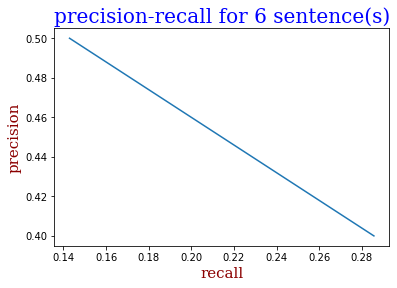

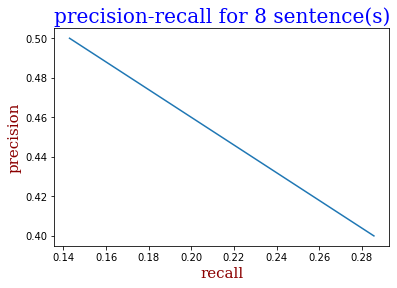

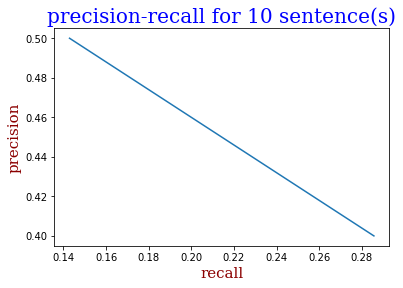

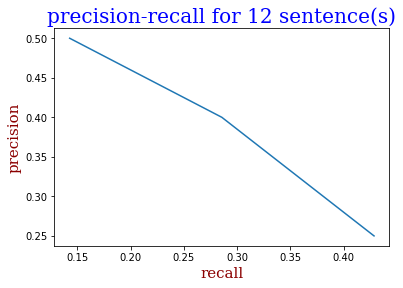

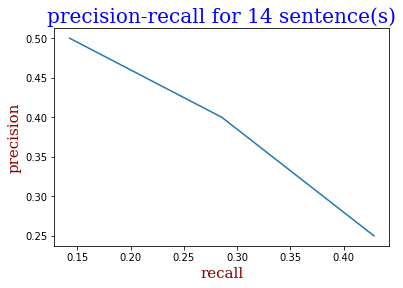

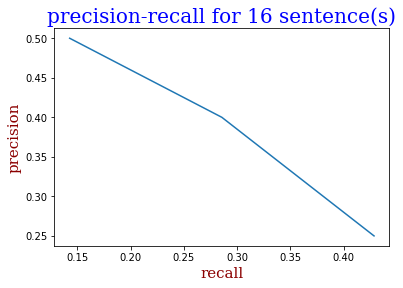

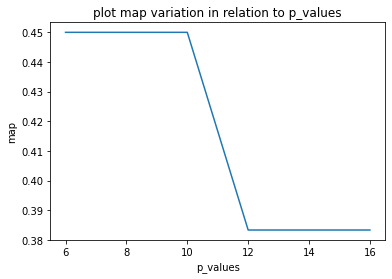

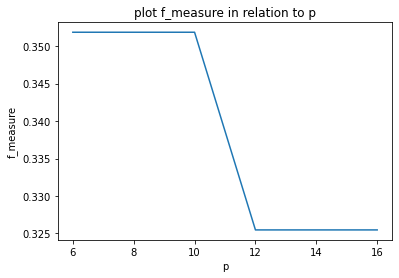

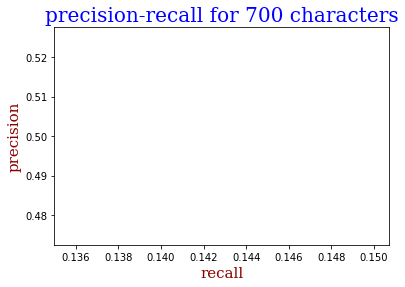

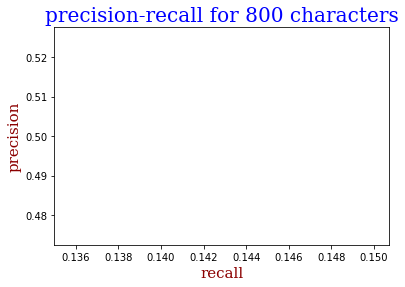

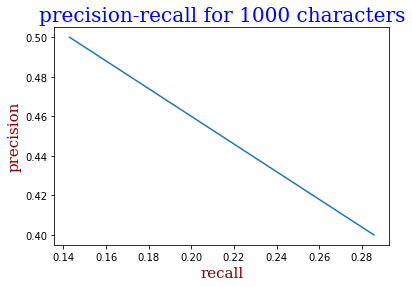

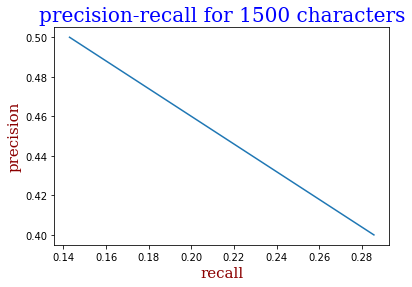

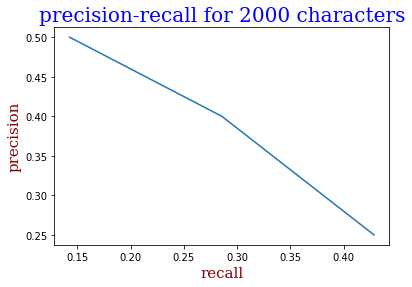

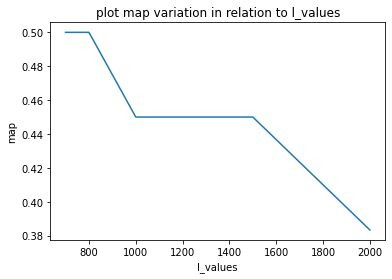

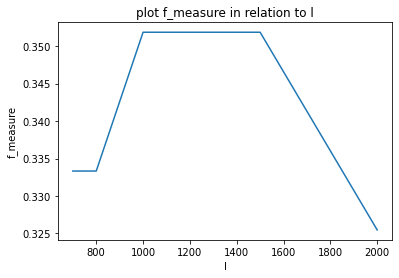

100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


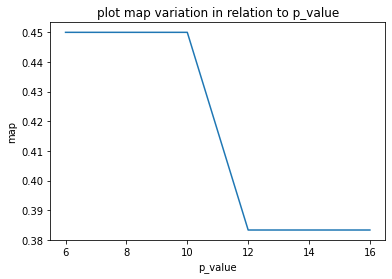

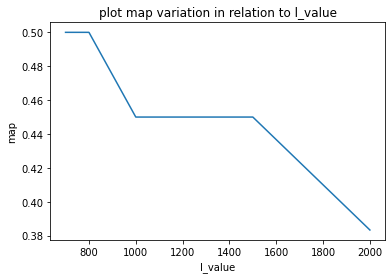

Starting evaluation of classifier with relevance feedback...
Evaluating Classification Results for Test Set...


  0%|          | 0/1 [00:00<?, ?it/s]

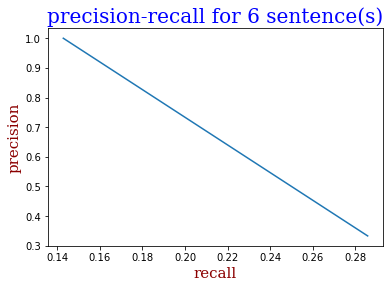

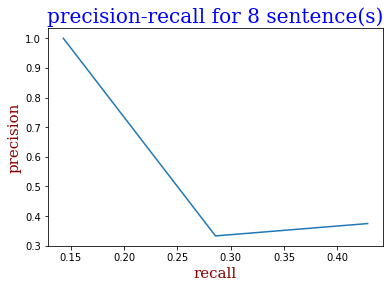

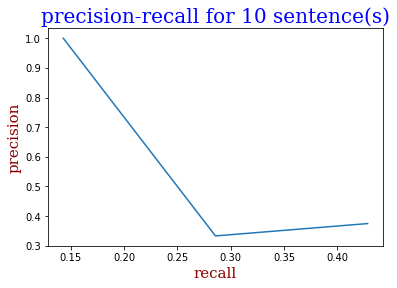

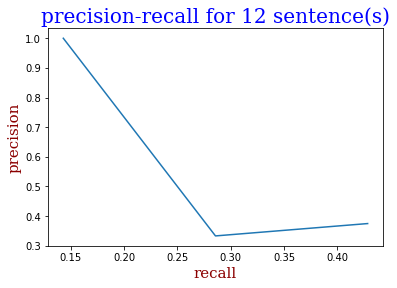

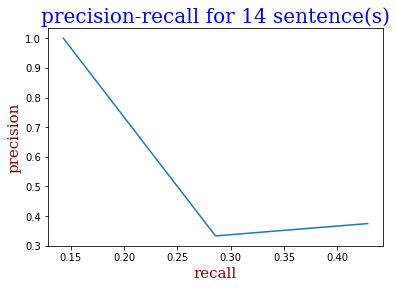

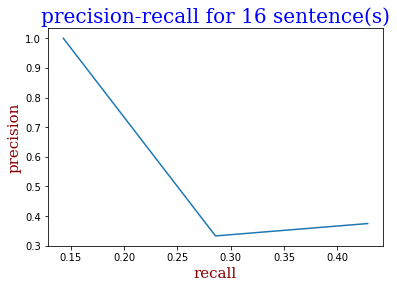

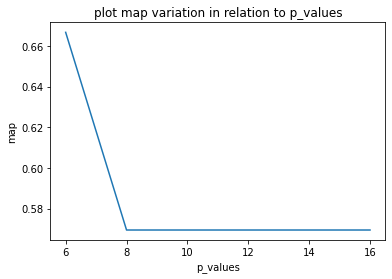

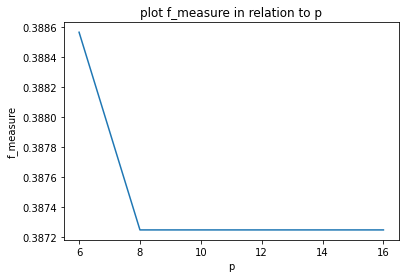

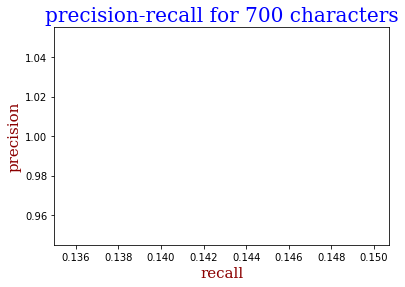

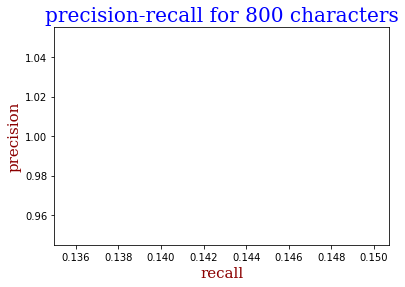

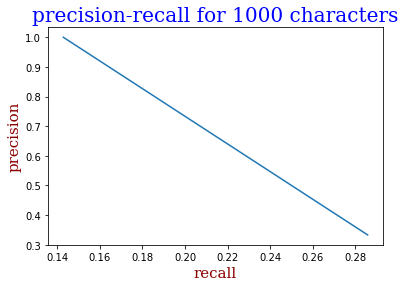

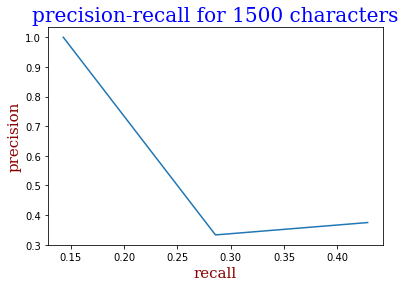

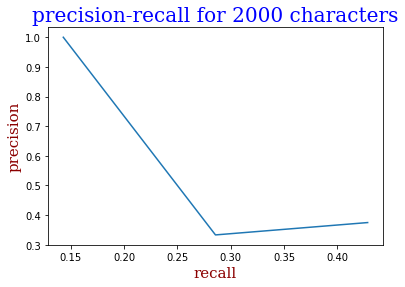

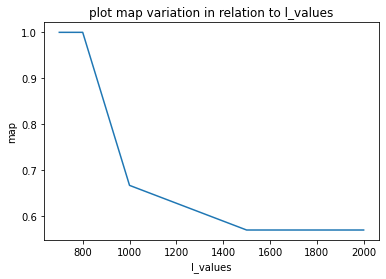

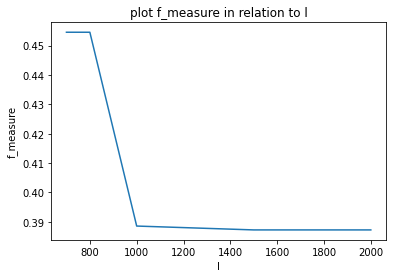

100%|██████████| 1/1 [00:02<00:00,  2.53s/it]


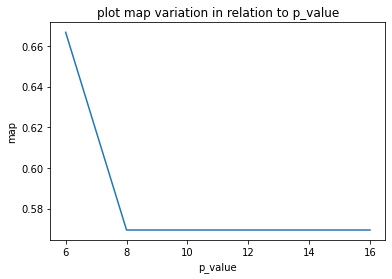

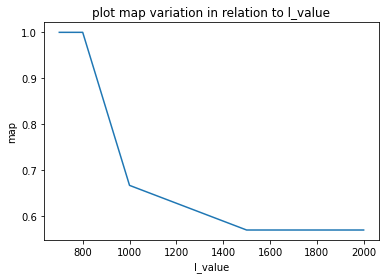

0.5694444444444444

In [ ]:
def build_precision_recall_graph(doc,recall, precision, p, l): 
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    if p != None: 
        plt.title("precision-recall for " + str(p) + " sentence(s)",font1)
    else: 
        plt.title("precision-recall for " + str(l) + " characters",font1)
    plt.xlabel("recall", font2)
    plt.ylabel("precision", font2)
    plt.plot(recall,precision)
    plt.show()

def build_f_measure_graph(mean_f_measure,X,x_axis_name,doc):
    if len(mean_f_measure) == 0: 
        return
    plt.title("plot f_measure in relation to " + x_axis_name) 
    plt.xlabel(x_axis_name)
    plt.ylabel("f_measure")
    plt.plot(X,mean_f_measure)
    plt.show()

def build_precision_recall_curve(doc,ref_summary_sentences, summary_sentences, p, l): 
    total_retrieved_docs = 0
    relevant_retrieved_docs = 0
    recall = []
    precision = []
    f_measure = []
    for sentence in summary_sentences:
        total_retrieved_docs +=1
        if sentence in ref_summary_sentences: 
            relevant_retrieved_docs +=1 
            current_recall = relevant_retrieved_docs / len(ref_summary_sentences)
            recall.append(current_recall)
            current_precision = relevant_retrieved_docs / total_retrieved_docs
            precision.append(current_precision)
            f_measure.append(1.25*((current_precision*current_recall)/(0.25 * current_precision+current_recall)))
    if len(f_measure) == 0:
        mean_fmeasure = 0
    else:
        mean_fmeasure = sum(f_measure) / len(f_measure)
    build_precision_recall_graph(doc,recall, precision, p, l)
    return mean_fmeasure

def mean_average_precision(rank, ref_summary_sentences):
    average_precision = 0
    relevant_docs = 0
    total_retrieved_docs = 0
    for sentence in rank:
        total_retrieved_docs += 1
        if sentence in ref_summary_sentences:  
            relevant_docs += 1
            average_precision += relevant_docs / total_retrieved_docs
    if relevant_docs > 0: 
        mean_average_precision = average_precision  / relevant_docs
    else: 
        mean_average_precision = 0
    return mean_average_precision

def plot_map_variation(map, x_axis_name, x_axis_values, doc): 
    if len(map) == 0: 
        return
    plt.title("plot map variation in relation to " + x_axis_name) 
    plt.xlabel(x_axis_name)
    plt.ylabel("map")
    plt.plot(x_axis_values,map)
    plt.show()

def summary_size_evaluation(produced_summary_sentences,ref_summary_sentences,P,L,doc):
    map_for_p = []
    mean_f_measure_for_p = []
    for p_value in P:
        summary_sentences = produced_summary_sentences[:p_value]
        mean_f_measure = build_precision_recall_curve(doc,ref_summary_sentences,summary_sentences,p_value,None)
        map = mean_average_precision(summary_sentences,ref_summary_sentences)
        map_for_p.append(map)
        mean_f_measure_for_p.append(mean_f_measure)
    plot_map_variation(map_for_p, "p_values", P, doc)
    build_f_measure_graph(mean_f_measure_for_p,P,"p",doc)
    map_for_l = []
    mean_f_measure_for_l = []
    for l_value in L:
        summary = build_summary(produced_summary_sentences,l_value)[0]
        summary = re.sub(r'([a-z])\.([a-z])', r'\1. \2',summary)
        summary = re.sub(r'([0-9])\.([a-z])', r'\1. \2',summary)
        summary = re.sub(r'([a-z])\.([0-9])', r'\1. \2',summary)
        summary_sentences = sent_tokenize(summary)
        mean_f_measure = build_precision_recall_curve(doc,ref_summary_sentences,summary_sentences,None,l_value)
        map = mean_average_precision(summary_sentences,ref_summary_sentences)
        map_for_l.append(map)
        mean_f_measure_for_l.append(mean_f_measure)
    plot_map_variation(map_for_l,"l_values", L, doc)
    build_f_measure_graph(mean_f_measure_for_l,L,"l",doc)
    return map_for_p, map_for_l

def evaluation(D,S,M,rf=False,P=[6,8,10,12,14,16],L=[700,800,1000,1500,2000]):
    map_for_p_docs = [0 for i in range(len(P))]
    std_for_p_docs = []
    map_for_l_docs = [0 for i in range(len(L))]
    count = 1
    print("Evaluating Classification Results for Test Set...")
    for doc,summary in tqdm(zip(D,S),total=len(D)):
        if not rf:
            produced_summary_sentences = get_full_summary(doc,M)
        else:
            produced_summary_sentences = get_full_summary_rf(doc,summary,M)
        ref_summary_sentences = sent_tokenize(summary)
        map_for_p, map_for_l = summary_size_evaluation(produced_summary_sentences,ref_summary_sentences,P,L,count)
        for i in range(len(map_for_p)): 
            map_for_p_docs[i] += map_for_p[i]
            if i == 4:
                std_for_p_docs.append(map_for_p[i])
        for i in range(len(map_for_l)): 
            map_for_l_docs[i] += map_for_l[i]
        count+=1
    for i in range(len(map_for_p_docs)): 
        map_for_p_docs[i] = map_for_p_docs[i] / len(D)
    plot_map_variation(map_for_p_docs, "p_value", P, "general")
    for i in range(len(map_for_l_docs)): 
        map_for_l_docs[i] = map_for_l_docs[i] / len(D)
    plot_map_variation(map_for_l_docs, "l_value", L, "general")
    average_p_precision = map_for_p_docs[1]
    return average_p_precision

# Without relevance feedback
print("Starting evaluation of classifier without relevance feedback...")
evaluation([clean_news_articles[2001]],[clean_news_summaries[2001]],model,rf=False)
print("Starting evaluation of classifier with relevance feedback...")
# With relevance feedback
evaluation([clean_news_articles[2001]],[clean_news_summaries[2001]],model,rf=True)

<h3>Part III: link analysis</h3>

*A) Graph construction*

In [ ]:
class graph:
    def __init__(self,nodes,edges):
        self.nodes = nodes
        self.edges = edges

    def __str__(self):
        repr = ""
        for i in range(len(self.nodes)):
            repr = repr + str(i) + " - " + self.nodes[i] + ": "
            for edge in self.edges[i]:
                repr += str(edge[0]) + "," + str(edge[1]) + "   "
            repr += '\n'    
        return repr

def cosine_similarity_graph(term_sentence_dict, term_document_dict):
    dot_product = 0
    sentence_mod = 0
    document_mod = 0
    for term in term_sentence_dict.keys():
        if term in term_document_dict.keys(): 
            dot_product += term_sentence_dict[term] * term_document_dict[term]
        sentence_mod += term_sentence_dict[term] * term_sentence_dict[term]
    for term in term_document_dict.keys():
        document_mod += term_document_dict[term] * term_document_dict[term]
    if dot_product == 0:
        return -1
    sentence_mod = np.sqrt(sentence_mod)
    document_mod = np.sqrt(document_mod)
    cosine_similarity = dot_product / (sentence_mod * document_mod)
    return cosine_similarity
      
def build_graph(d,similarity_criteria,similarity_threshold):
    document_sentences = sent_tokenize(d)
    nodes = []
    edges = {}
    for i in range(len(document_sentences)):
        for j in range(i+1,len(document_sentences)):
            if similarity_criteria == "cosine_tfidf":
                tfidf_sentence_term_i = TfidfVectorizer()
                term_sentence_vector_i = tfidf_sentence_term_i.fit_transform([document_sentences[i]])
                term_sentence_dict_i = dict(zip(tfidf_sentence_term_i.get_feature_names_out(),term_sentence_vector_i.data))
                tfidf_sentence_term_j = TfidfVectorizer()
                term_sentence_vector_j = tfidf_sentence_term_j.fit_transform([document_sentences[j]])
                term_sentence_dict_j = dict(zip(tfidf_sentence_term_j.get_feature_names_out(),term_sentence_vector_j.data))
            similarity = cosine_similarity_graph(term_sentence_dict_i,term_sentence_dict_j)
            if similarity >= similarity_threshold:
                if edges.get(i) != None:
                    edges.get(i).append((j,similarity))
                else:
                    edges[i] = [(j,similarity)]
                if edges.get(j) != None:
                    edges.get(j).append((i,similarity))
                else:
                    edges[j] = [(i,similarity)]
        nodes.append(document_sentences[i])
    return graph(nodes,edges)

*B) Undirected page rank*

In [ ]:
def undirected_page_rank(d,p,similarity_criteria,similarity_threshold):
    graph = build_graph(d,"cosine_tfidf",similarity_threshold)
    E = np.zeros((len(graph.nodes),len(graph.nodes)))
    for i in range(len(graph.nodes)):
        if graph.edges.get(i) != None:
            for edge in graph.edges[i]:
                E[i,edge[0]] = 1
                E[edge[0],i] = 1
    for i in range(len(graph.nodes)):
        if E[:,i].sum() == 0:
            E[:,i] = 1
            E[i,:] = 1
            E[i,i] = 0
    M = np.zeros((len(graph.nodes),len(graph.nodes)))
    for column in range(len(graph.nodes)):
        out_links = E[:, column].astype('bool')
        total_n_out_links = out_links.sum()
        M[out_links, column] = 1/total_n_out_links
    damp_factor = 0.1
    n_iter = 20
    M = (M * (1-damp_factor)) + (damp_factor * 1/len(graph.nodes))
    r = np.full((len(graph.nodes)), 1/len(graph.nodes))
    for i in range(n_iter):
        r = np.dot(M, r)      
    sentence_dict = {graph.nodes[i]:r[i] for i in range(len(graph.nodes))}   
    sentence_dict = dict(sorted(sentence_dict.items(), key=operator.itemgetter(1),reverse=True))
    sentence_dict = dict(itertools.islice(sentence_dict.items(), p))
    return sentence_dict

display("Summary for business/001.txt using undirected page rank:")
print(build_summary(list(undirected_page_rank(clean_news_articles[0],8,"cosine_tfidf",0.3).keys()),800)[0])

'Summary for business/001.txt using undirected page rank:'

not only would his government stick to labour spending plans on core public services, including health and education, it would increase spending on defence, police and pensions.
at its simplest, it is saying: "vote tory and you can have it both ways".
this was the pre-election message many in his party have been pressing for and voters, he believes, will warm to.
should he win the next general election, he has earmarked £4 billion that will be used to reduce taxes - although he still will not say which or how.
he insists he will not promise anything before the election that he cannot deliver if put into downing street.



*C) Evaluation*

Starting evaluation of page rank...
1
Evaluating Classification Results for Test Set...


  0%|          | 0/1 [00:00<?, ?it/s]

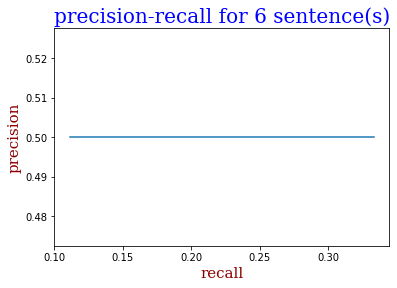

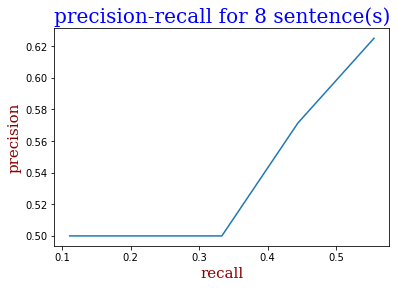

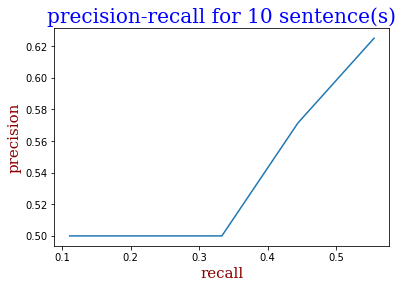

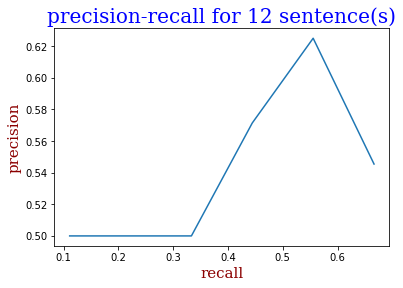

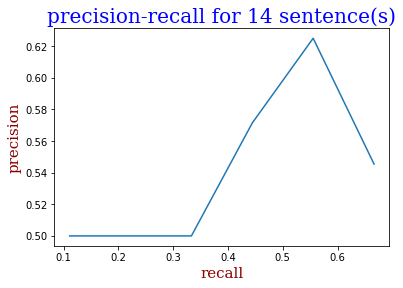

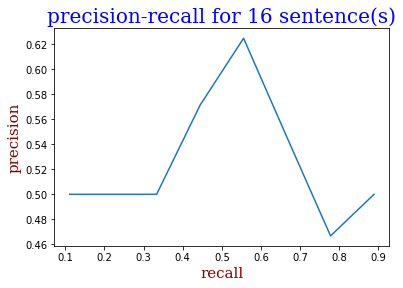

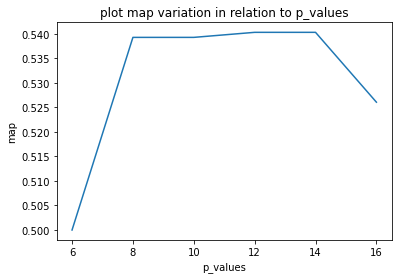

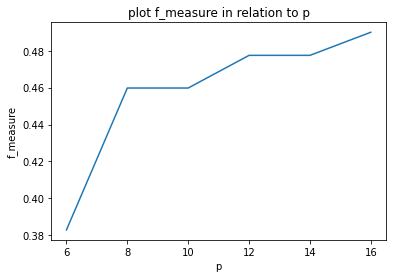

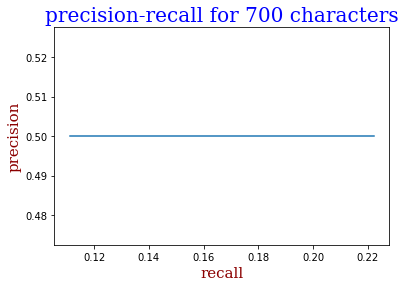

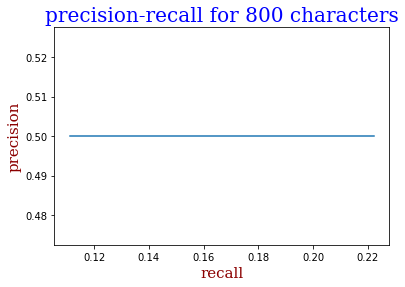

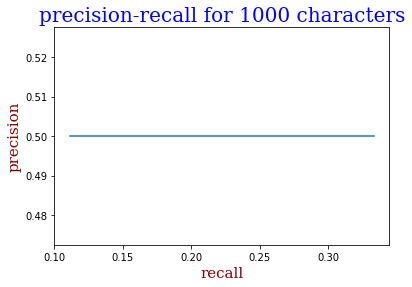

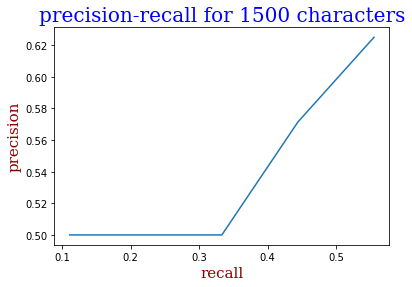

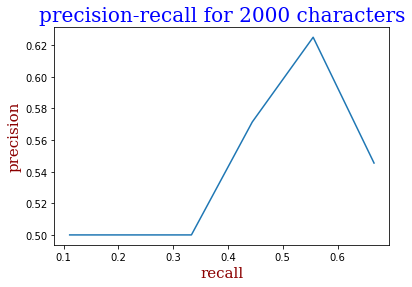

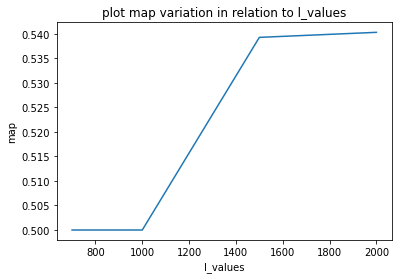

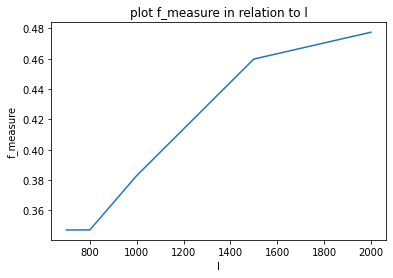

100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


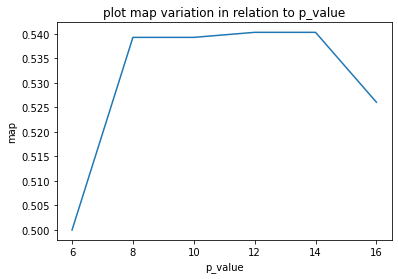

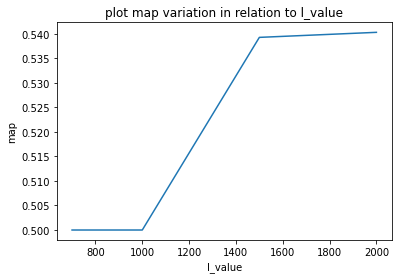

0.5392857142857143

In [ ]:
def evaluation_page_rank(D,S,P=[6,8,10,12,14,16],L=[700,800,1000,1500,2000]):
    print(len(D))
    map_for_p_docs = [0 for i in range(len(P))]
    std_for_p_docs = []
    map_for_l_docs = [0 for i in range(len(L))]
    count = 1
    print("Evaluating Classification Results for Test Set...")
    for doc,summary in tqdm(zip(D,S),total=len(D)):
        produced_summary_sentences = list(undirected_page_rank(doc,16,"cosine_tfidf",0.1).keys())
        ref_summary_sentences = sent_tokenize(summary)
        map_for_p, map_for_l = summary_size_evaluation(produced_summary_sentences,ref_summary_sentences,P,L,count)
        for i in range(len(map_for_p)): 
            map_for_p_docs[i] += map_for_p[i]
            if i == 4:
                std_for_p_docs.append(map_for_p[i])
        for i in range(len(map_for_l)): 
            map_for_l_docs[i] += map_for_l[i]
        count+=1
    for i in range(len(map_for_p_docs)): 
        map_for_p_docs[i] = map_for_p_docs[i] / len(D)
    plot_map_variation(map_for_p_docs, "p_value", P, "general")
    for i in range(len(map_for_l_docs)): 
        map_for_l_docs[i] = map_for_l_docs[i] / len(D)
    plot_map_variation(map_for_l_docs, "l_value", L, "general")
    average_p_precision = map_for_p_docs[1]
    return average_p_precision
 
print("Starting evaluation of page rank...")
evaluation_page_rank([clean_news_articles[0]],[clean_news_summaries[0]])  

<H2>Question materials (optional)</H2>

<H3>Part I: clustering</H3>

Answered in the report.

<H3>END</H3>